<a href="https://colab.research.google.com/github/marcinwolter/Machine-learning-KISD-2023/blob/main/lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

Lecture 2 


##**<font color = "green">Decorrelaton, overtraining, simple classifiers: <br> kNN, Kernel Density Estimators, Decision Trees,<br> and ensamble learning: <br> Boosted Decision Trees BDT </font>**

*8 March 2023*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_20.png)


#<font color='green'>**Topics:**


* <span style="color:#00000A">Decorrelation  </span>


* <span style="color:#00000A">Simple non\-linear methods like k\-nearest neighbors, decision trees and kernel methods\.</span>
* ensamble learning - Boosted / Bagged Decision Trees BDTs
* example program- face recognition

<br>
<br>

<span style="color:#C9211E"> **All slides are available here:** </span>  
https://github.com/marcinwolter/Machine-learning-KISD-2023


#<font color='green'>**Decorrelation:**

<span style="color:#800000"> __Removes correlation between variables by a rotation in the space of variables__ </span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_26.png)

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_27.png)



# **How to decorrelate?**

**Covariance matrix:**
$$
\begin{bmatrix} Var(x_{1}) & ... & Cov(x_{1},x_{n})\\ : &. & :\\ :& \: \: \: \: \: \: \: \: \: \: .& :\\ Cov(x_{n},x_{1}) & ... & Var(x_{n}) \end{bmatrix}
$$

where:
* Sample Variance: $var(x) =  \frac{\sum_{1}^{n}\left ( x_{i} -\overline{x}\right )^{2} }{n-1}$
* Sample Covariance: $ cov(x, y) = \frac{\sum_{1}^{n}\left ( x_{i} -\overline{x}\right )\left ( y_{i}-\overline{y} \right ) }{n-1} $

 * $\bar{x} = $ mean of sample data.
 * $n =$ number of observations in the dataset.
 * $x_i = $ observations in dataset $x$.

The decorrelated dataset $x$ is given by:
$$x ⟶ (C')^{−1}x $$ 

where $C'$ is the square-root of covariance matrix C. 
It is a matrix 
that multiplied with itself yields $C:~~C = (C' * C')$.<br>
**We compute the square-root matrix by using the *scipy.linalg.sqrtm()* function and than invert it using *np.linalg.inv()*.**



Covariance matrix:
[[0.75693565 0.28186631]
 [0.28186631 0.39288421]]


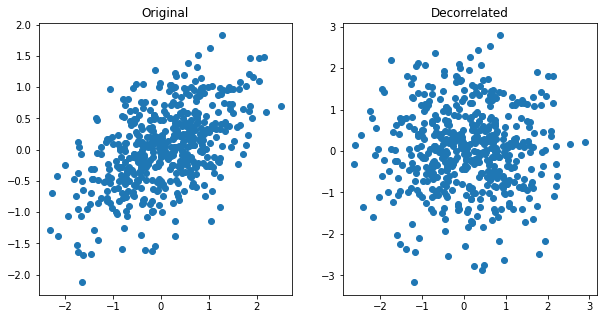

Decorrelating matrix:
[[ 1.27583482 -0.41829103]
 [-0.41829103  1.816089  ]]
Covariance matrix after decorrelation:
[[ 1.00000000e+00 -2.20268248e-16]
 [-2.20268248e-16  1.00000000e+00]]
Covariance matrix is diagonal now.


In [72]:
import numpy as np
from sklearn.covariance import EmpiricalCovariance
from scipy.linalg import sqrtm

import matplotlib.pyplot as plt

# Real covariance
real_cov = np.array([[.8, .3],
                     [.3, .4]])
rng = np.random.RandomState(0)

# generate data
X = rng.multivariate_normal(mean=[0, 0],
                            cov=real_cov,
                            size=500)

# Calculate covariance matrix
cov = EmpiricalCovariance().fit(X).covariance_  
print("Covariance matrix:")
print(cov)

# Plot data
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1])
plt.title("Original")

# Calculate the inverted sqare root of covariance matrix
cov_prime = np.linalg.inv(sqrtm(cov))

#  X_deco = inv(sqrtm(Cov))*X
for i in range(len(X)):
  X[i,:] = np.dot((cov_prime),X[i,:])

plt.subplot(122)
plt.scatter(X[:,0],X[:,1])
plt.title("Decorrelated")
plt.show()

print("Decorrelating matrix:")
print(cov_prime)

print("Covariance matrix after decorrelation:")
print(EmpiricalCovariance().fit(X).covariance_)
print("Covariance matrix is diagonal now.")




#<font color='green'>**Simple classifiers**

* <span style="color:#000000">We have learned about:</span>
  * <span style="color:#000000">Classifiers:</span>
    * <span style="color:#000000">Cuts</span>
    * <span style="color:#000000">Fisher Linear Discriminant</span>
    * <span style="color:#000000">Naive Bayes</span>
  * <span style="color:#000000">Unsupervised method</span>
    * <span style="color:#000000">Decorrelation</span>
    * <span style="color:#000000">Principal Component Analysis</span>
* <span style="color:#000000">Today we will talk about:</span>
  * <span style="color:#000000">Other discrimimants: k\-nearest neighbors\, decission trees and kernel density estimators</span>
  * <span style="color:#000000">Overtraining problem in practice\.</span>
  * Boosted / Bagged Decision Trees BDT
  * <span style="color:#000000">Example of face classification – eigenfaces\.</span>



#<font color='green'> __KNN \- k nearest neighbors__ </span>

<span style="color:#000000">Proposed already in 1951</span>

<span style="color:#000000">An event is qualified to the class\, to which belongs the majority of it’s k nearest neighbors\, </span>
<span style="color:#000000">or the probability of belonging to the class “signal” is calculated as:</span>

###$$ p(S|x) =\frac{k_S}{k} $$

The number of $k$ nearest neighbours is a free parameter.

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_230.png)



<span style="color:#270A29">The only parameter that can adjust the complexity of KNN is the number of neighbors </span>  <span style="color:#270A29"> _k_ </span>  <span style="color:#270A29">\. </span>
<span style="color:#270A29">The larger </span>  <span style="color:#270A29"> _k_ </span>  <span style="color:#270A29">is\, the smoother the classification boundary\.

 We can say the complexity of KNN is lower when </span>  <span style="color:#270A29"> _k_ </span>  <span style="color:#270A29">increases\.</span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_231.png)

* solid line - decision boundary
* dashed line - true Bayes Decision Boundary
* <font color="color:red">significant **OVERTRAINING** 

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_232.png)



# **KNN example**

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Fit the classifier

In [74]:
# number of neighbors in KNN
n_neighbors = 6


# Generate sample data
n_samples = 300
centers = [[1, 1], [-1, -1], [1, -1]]

X, y = datasets.make_blobs(
    n_samples=n_samples, centers=centers, cluster_std=0.80, random_state=0
)

print("Target is 0,1 or 2: ",y)

# Train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# we create an instance of Neighbours Classifier and fit the data.
# K nearest neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform") # "distance"
# Decision tree
###clf = DecisionTreeClassifier(max_depth=5)

clf.fit(X_train, y_train)



Target is 0,1 or 2:  [0 1 1 0 0 1 2 2 1 0 2 0 0 2 0 2 2 2 2 2 0 0 0 0 2 0 2 1 2 1 1 2 0 1 2 1 1
 1 1 0 0 0 2 0 1 2 2 2 2 0 0 0 2 1 1 1 1 0 1 0 2 1 1 2 2 2 2 0 1 0 1 2 0 0
 2 2 1 1 0 2 1 0 2 1 1 0 0 1 2 0 1 0 1 0 1 0 1 2 0 2 0 0 2 0 0 1 1 2 1 1 1
 1 1 2 0 1 2 2 1 2 1 1 1 1 1 1 0 2 2 2 0 2 2 1 0 1 0 2 1 0 2 2 2 0 2 0 1 2
 2 1 1 0 0 0 1 0 1 0 0 0 0 2 1 0 2 2 2 1 0 0 0 2 2 0 0 0 0 2 2 0 2 0 0 1 2
 0 1 2 0 1 1 1 0 2 1 2 0 2 0 2 0 0 2 1 1 1 1 0 2 2 0 1 1 1 0 2 0 0 2 0 1 1
 0 1 2 2 2 0 0 1 2 2 2 1 2 0 1 1 0 1 1 2 0 1 2 0 0 2 0 2 2 2 1 0 2 2 0 1 1
 1 1 0 0 0 0 0 2 2 1 0 0 1 1 1 2 1 2 1 1 2 2 2 1 2 0 2 1 0 2 1 1 2 1 1 1 2
 0 1 2 2]


KNeighborsClassifier(n_neighbors=6)

### Testing and training accuracy: if these two values differ we have overtraining

In [75]:
print("Training accuracy: ",accuracy_score(y_train, clf.predict(X_train)))
print("Testing accuracy:  ",accuracy_score(y_test, clf.predict(X_test)))


Training accuracy:  0.8905472636815921
Testing accuracy:   0.8181818181818182


### Put everything on plot

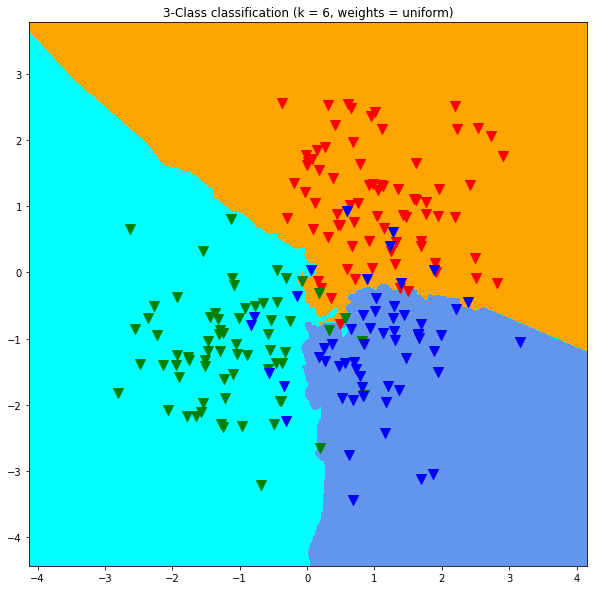

In [76]:

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


plt.figure(figsize=(10, 10))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_light) 

# Plot also the training points
color = ['red','green','blue']
for i in range(3):
    #plt.scatter(X_test[np.where(y_test==i), 0], X_test[np.where(y_test==i), 1], s=100, marker="o",color=color[i])
    plt.scatter(X_train[np.where(y_train==i), 0], X_train[np.where(y_train==i), 1], s=100, marker="v",color=color[i])


plt.title(
        "3-Class classification (k = %i, weights = uniform)" % (n_neighbors)
)


plt.show()

#<font color='red'> **Exercise:**
* play with the parameter *n_neighbours*. How does the classification depend on this parameter?


#<font color='green'> **Kernel density estimators**

<span style="color:#000000">Approximation of the unknown probability density as a sum of kernel functions centered in the points x</span>  <span style="color:#000000">n</span>  <span style="color:#000000"> of the training sample \(Parzen\, years 1960\-ties\)\. </span>

$$ D(X) = \frac{P(S)}{P(S)+P(B)} $$

<span style="color:#000000">Typical kernel functions:
>  Gaussian, $\frac{1}{x^n}$  <span style="color:#000000"> itp\.</span>





<span style="color:#000000">Simple idea\, but using this method requires a lot of memory and CPU\.</span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_245.png)

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_246.png)

Approximated probability density \(blue\) comapared to the true probability density \(green\) as a function of the width of the Gaussian kernel function\. We can see\, that the width is a smoothing parameter\.



<span style="color:#800000"> __QUAERO package from the D0 experiment__ </span>

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_247.png)

_Phys\. Rev\. Lett\. 87 \(2001\) 231801\,_



#<font color='green'> **PDE\_RS – extension of the Parzen methods**

*published by T\. Carli\, B\. Koblitz\, NIM A 501 \(2003\) 576\-588*

<span style="color:#000000">Counts signal $n_S$ and background $n_B$ events in N\-dimensional cube around the classified event – only few events from the training sample are needed\. </span>
<span style="color:#000000">Size of the cube is a free parameter\.</span>



* <span style="color:#000000">Simple analysis\.</span>

* <span style="color:#000000">Events stored in the binary tree – the neighbor events are found quickly\.</span>

* <span style="color:#000000">It’s a special case of Parzen method – the kernel function: </span>

$$ f(x) = \left\{
\begin{eqnarray}
0 ~&if&outside~box \\
1 ~&if&inside~box \\
\end{eqnarray} \right.
 $$

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_248.png)



# <font color='green'>**Simple 1D example of Parzen method**

In [77]:
%matplotlib inline

# **Kernel Density example**
from https://stackabuse.com/kernel-density-estimation-in-python-using-scikit-learn/ 

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

Generate synthetic data

In [79]:
def generate_data(seed=17):
    # Fix the seed to reproduce the results
    rand = np.random.RandomState(seed)
    x = []
    dat = rand.lognormal(0, 0.3, 1000)
    x = np.concatenate((x, dat))
    dat = rand.normal(3, 1, 1000)
    x = np.concatenate((x, dat))
    return x

Generate data and store in x_train.

Plot data.

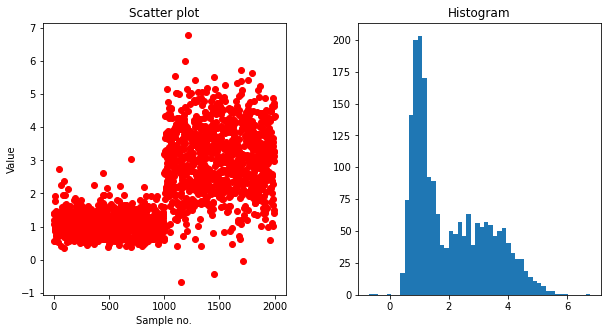

In [80]:
x_train = generate_data()[:, np.newaxis]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()

Generate points x_test between (-4,8)

In [81]:
x_test = np.linspace(-4, 8, 2000)[:, np.newaxis]

Fit model and find a density for each point

In [82]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

Plot it

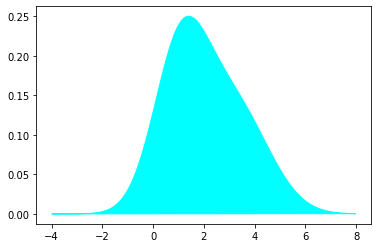

In [83]:
plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.show()

Try different bandwidth (kernel width)

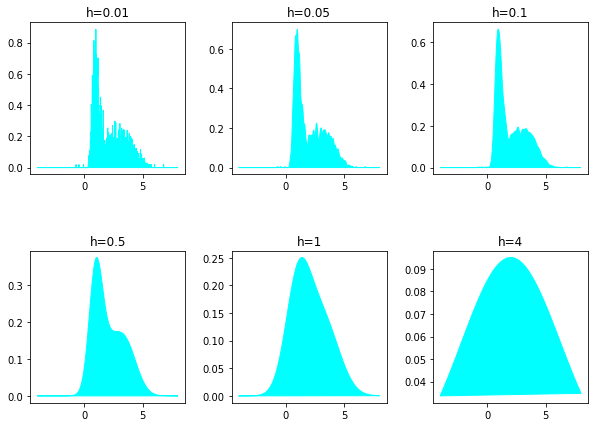

In [84]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()



---



---



---



# <font color='green'> **Decision trees**

* <span style="color:#000000">**Decision tree** – a series of cuts\, each „leaf” \(A\,B\,C\,D\,E\) has a label\, for example ”signal” and “background”\.</span>

* <span style="color:#000000">Easy in visualization and interpretation</span>

* <span style="color:#000000">Resistant for </span>  <span style="color:#000000"> _outliers_ </span>  <span style="color:#000000">\. </span>

* <span style="color:#000000">Weak variables are ignored\.</span>

* <span style="color:#000000">Fast training and classification\.</span>

* <span style="color:#000000">**Unfortunately:** </span>  <span style="color:#000000"> __sensitive for fluctuations\, unstable__ </span>  <span style="color:#000000">\. </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_234.png' width=350px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture2/MachineLearning2020_235.png' width=350px>





# <font color='green'> **Building the tree**



* <span style="color:#000000">We start from the root\.</span>

* <span style="color:#000000">We divide the training sample by the best separating cut on the best variable\.</span>

* <span style="color:#000000">We repeat the procedure until the stopping conditions are fulfilled\, for example: number of leafs\, number of events in a leaf etc\. </span>

* <span style="color:#000000">The ratio S/B in a leaf defines the classification \(binary signal or background\, or a real number giving the probability\, that a given event is a signal\)\.</span>

<span style="color:#000000"> __Definitions of separation:__ </span>

* <span style="color:#000000">Gini inpurity:  \(</span>  <span style="color:#000000"> _Corrado Gini 1912\, invented the Gini index used to measure the inequality of incomes_ </span>  <span style="color:#000000">\)</span>

$$ purity = p (1-p), ~~  : p= P(signal)$$, 

* <span style="color:#000000">Cross\-entropy:</span>

$$cross\_entropy = -(p \ln p + (1-p)\ln(1-p))$$

* <span style="color:#000000">Missidentification:</span>

$$miss\_identification = 1-max(p,1-p)$$


# <font color='red'>**Exercise:**
**In the previos example replace KNeighborsClassifier by DecisionTreeClassifier**


# **Example of classifier use**


In [85]:
%matplotlib inline


# Classifier comparison


A comparison of a several classifiers in scikit-learn on synthetic datasets.
The point of this example is to illustrate the nature of decision boundaries
of different classifiers.
This should be taken with a grain of salt, as the intuition conveyed by
these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated
linearly and the simplicity of classifiers such as naive Bayes and linear SVMs
might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points
semi-transparent. The lower right shows the classification accuracy on the test
set.


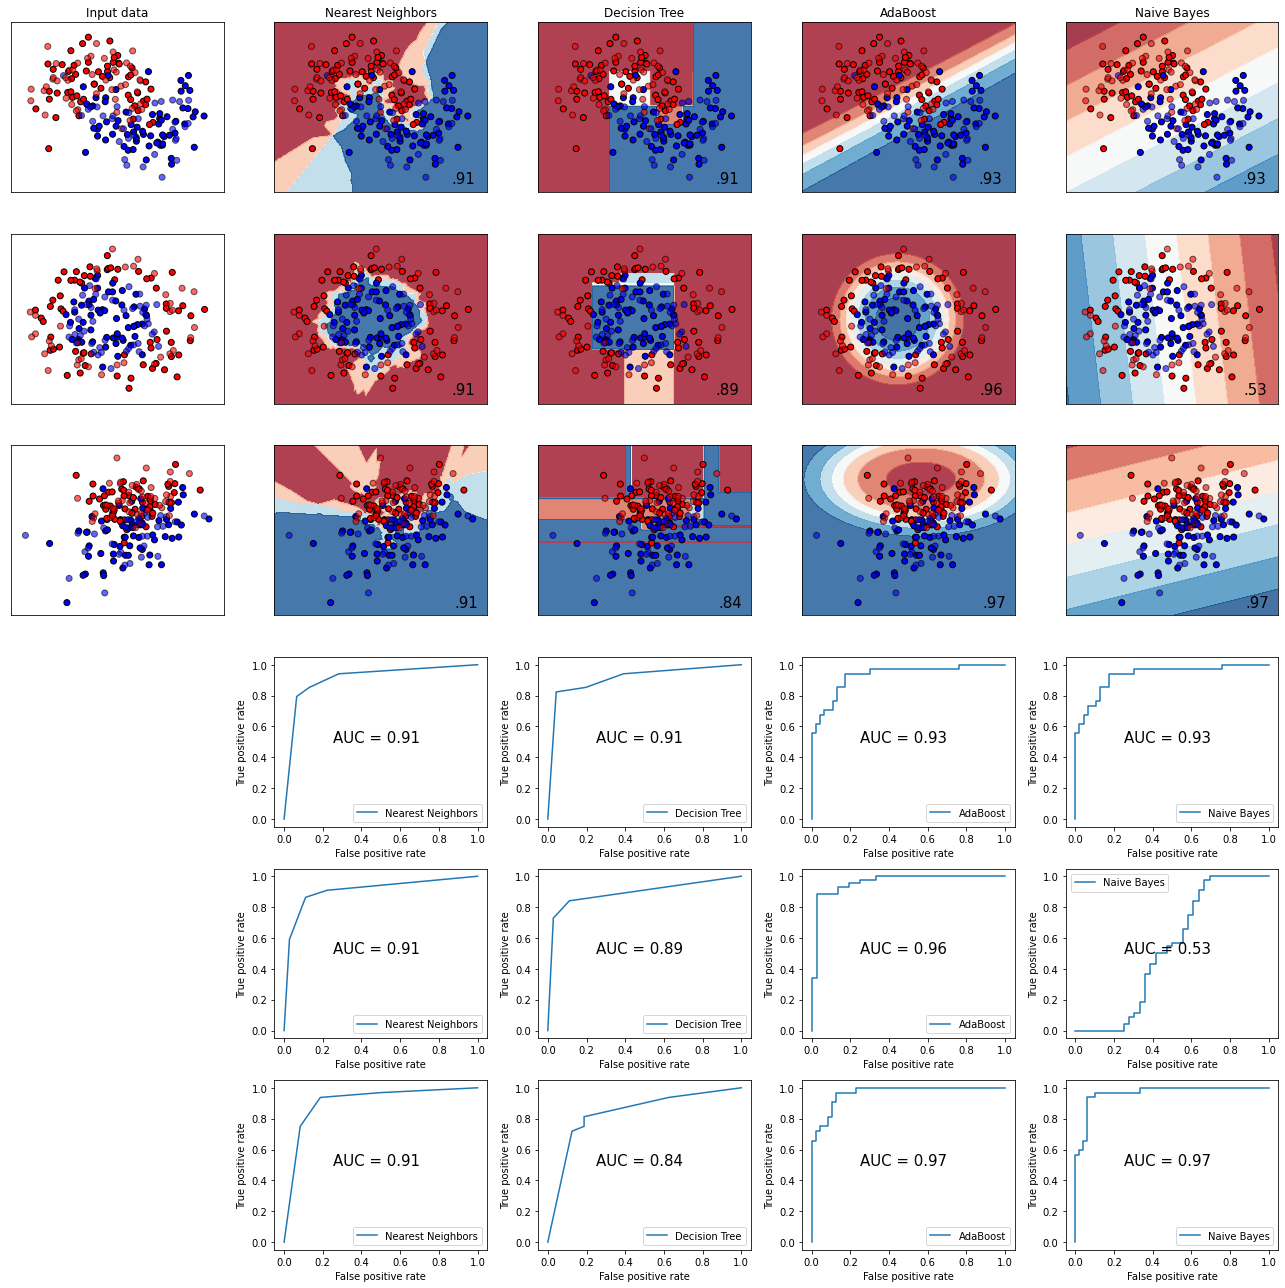

In [86]:

# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# Modified by MW

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# ensamble learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

h = .02  # step size in the mesh

names = ["Nearest Neighbors", 
         "Decision Tree", 
         "AdaBoost",
         "Naive Bayes",
         "LDA"]

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    #AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),n_estimators=100),
    GaussianNB(),
    LinearDiscriminantAnalysis()
    ]

# number of generated events
n_samples=200

X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(n_samples=n_samples, noise=0.3, random_state=0),
            make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(18, 18))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = roc_auc_score(y_test,clf.predict_proba(X_test)[:, 1])
        if (name=='MLP'):
          mlp=clf

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        # print score in plot    
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        # plot the roc curve
        ax = plt.subplot(2*len(datasets), len(classifiers) + 1, i+len(datasets)*(len(classifiers)+1))
        ZZ = clf.predict_proba(X_test)[:, 1]
        #print(y_test.shape,"   ",Z.shape)
        fpr, tpr, _ = roc_curve(y_test, ZZ)
        ax.plot(fpr, tpr, label=name)
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        #plt.title('ROC curve')
        plt.legend(loc='best')
        auc = roc_auc_score(y_test, ZZ)
        ax.text(0.7, 0.5, ('AUC = %.2f' % auc),
                size=15, horizontalalignment='right')


        i += 1

plt.tight_layout()
plt.show()

**Remark**:

We have plotted the ROC curve and calculated the integral.


# <font color='red'> **Exercise:**
* play with the parameters of classifiers
* and the number of generated data points.


#<font color='green'> **Boosting\, bagging\, BDT… ensemble learning**


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_428.png' width=450px>

<br>

##<font color='red'>**Ensamble learning:** using many weak classifiers to build a strong one.

<span style="color:#800000"> __What does BDT mean???__ </span>

* <span style="color:#000080"> __BDT – Boosted Decision Tree:__ </span>
  * <span style="color:#000000"> __Decision Tree__ </span>  <span style="color:#000000"> – an algorithm known for a long time\, used in many expert systems\. For example\, the first aid manual is frequently written in the form of a decision tree: if \(condition\) do something\, else do something different\, then check another condition\.\.\.</span>
  * <span style="color:#000000"> __Boosted__ </span>  <span style="color:#000000">  \- a method of joining many weak classifiers in an ensemble to get one strong classifier\. It is not limited to decision trees\, however it is most commonly used for decision trees\.</span>

* <span style="color:#800000"> __Boosting – ensemble of classifiers__ </span>

 * <span style="color:#008000"> __Problem: could we improve a weak classifier?__ </span>
 * <span style="color:#008000"> __Answer: yes\, by applying it many times\.__ </span>
 * <span style="color:#000000">An algorithm used most frequently:</span>  <span style="color:#000000"> __AdaBoost__ </span>  <span style="color:#000000">\(Freund & Schapire 1996 – Gödel prize\)</span>

<table>
<tbody>
  <tr>
    <td><img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_431.png' width=150px>
</td>
    <td><img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_430.png' width=150px></td>
  </tr>
  <tr>
    <td>Robert Schapire</td>
    <td>Yoav Freund</td>
  </tr>  
</tbody>
</table>









# <font color='green'>**How to perform boosting?**

* <span style="color:#000000">Build a decision tree\.</span>

* <span style="color:#000000">Increase the weights of **wrongly** classified events\.</span>

* <span style="color:#000000">Repeat many times \(typically 100\-1000\).</span>
As a result we get a "forest" of many trees. 



* <span style="color:#000000">At the end classify the events by “voting” of all the trees\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_429.png' width=450px>




<span style="color:#800000"> __AdaBoost in action__ </span>


In [87]:
# Display the movie

! wget https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/AdaBoostInAction.mp4 

from IPython.display import HTML
from base64 import b64encode
mp4 = open('AdaBoostInAction.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)



--2023-03-07 23:48:55--  https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/AdaBoostInAction.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 737578 (720K) [application/octet-stream]
Saving to: ‘AdaBoostInAction.mp4.1’

AdaBoostInAction.mp 100%[===================>] 720.29K  --.-KB/s    in 0.04s   

2023-03-07 23:48:55 (16.0 MB/s) - ‘AdaBoostInAction.mp4.1’ saved [737578/737578]



#**AdaBoost in action**

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_432.png' width=450px>

AdaBoost for 2\-dimensional data – results after 1st\, 2nd\, 3rd\, 5th\, 10th and 100th iteration\. The solid green line shows the results of the combined classifier\, the dashed line the borders between classes obtained after each step\.  For the last two plots the dotted line marks the class borders obtained from the bagging algorithm \(we will talk about bagging soon\)\.


#<font color='green'>**Boosting in detail**

* <span style="color:#000000">Five years after publication of AdaBoost Friedman proved\, that the algorithm in fact minimizes the exponential loss function:</span>

$$ E = \sum_{n=1}^N \exp{(-t_n f_m(x_n))}  $$

where $f(x)$ is the answer of the algorithm, <br>
$t = 1$ signal, $t = -1$ background <br>
* $t_n\cdot f_m(x_n)>0$ – correctly classified
* $t_n\cdot f_m(x_n)<0$ – incorrectly classified

Index $m$ is the iteration number.

<br>

<span style="color:#000000">Exponential function goes up quickly => huge punishment for wrongly classified events\, so the algorithm is sensitive for single\, outstanding points\. Classification becomes worse\, when data are hardly separable\. </span>



<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_434.gif' width=450px>




#<font color='green'>**AdaBoost algorithm in detail**</font>

1.   Give all vectors from the training set a weight $w_i =1/N$.
2.   For $m = 1,...,M$:

 * Train classifiers $y_m(x)$ on the training sample minimizing:
 $$ J_m= \sum_{n=1}^N w_n^m I(y_m(x_n) \neq  t_n)$$
 where $I(y_m(x_n) \neq  t_n)$ is an indicator function and equals 1 if $y_m(x_n) \neq  t_n$ and 0 otherwise.

 * Evaluate the quantities:
 $$  \epsilon_m = \frac{\sum_{n=1}^N w_n^m I(y_m(x_n) \neq  t_n)}{\sum_{n=1}^N w^m_n}   $$

 $$ \alpha_m = \frac{1}{2} \ln\frac{1-\epsilon_m}{\epsilon_m}$$

 *  Update the weights of the vectors in the training sample:
 
$$ w_n^{m+1} = w^m_n \cdot e^{\alpha_m I(y_m(x_n) \neq  t_n)} $$

<!---  
 $$ w_n^{m+1} = \left\{ \begin{aligned}
 \frac{w^m_n}{Z_m}e^{\alpha_m} ~~& for&~~ y_m(x_n) \neq t_n\\ 
 \frac{w^m_n}{Z_m}e^{-\alpha_m} ~~& for&~~ y_m(x_n) = t_n
 \end{aligned}\right. $$
---> 

<span style="color:#000000">The result of voting is given as:</span>

$$ Y_M({\bf x}) = sign{\left( \sum_{m=1}^M \alpha_m y_m({\bf x}) \right)}$$

<span style="color:#000000">All the classifiers are trained on the same training sample\, but with different weights\. These weights depend on the results of the preceding training\, so it’s difficult to train many classifiers in parallel\.</span>

*C. Bishop, Pattern recognition and machine learning. Springer, 2009.*






#**Classifier boosting**

<span style="color:#000000">Boosting – in a “magical” way we get a strong classifier out of weak ones</span>

<span style="color:#000000"> __Typically boosting used on decision trees – Boosted Decision Trees BDT__ </span>  but might be also applied to another classifiers.

 * <span style="color:#000000">Good results without time consuming tuning of parameters:         </span>



 * <span style="color:#000000">Relatively resistant on overtraining\.</span>

 * <span style="color:#000000">Quite frequently used and with good results\!</span>

<br>

###**Application of a boosting algorithm \(5 iterations\) to the Naive Bayes classifier\.**

<table>
<tbody>
  <tr>
    <td><img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_442.png' width=300px></td>
    <td><img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_443.png' width=300px></td>
  </tr>
  <tr>
    <td> Naive Bayes</td>
    <td>5 times boosted Naive Bayes</td>
  </tr>
</tbody>
</table>







#<font color='green'> **Bagging \(Bootstrap AGGregatING\)**

* <span style="color:#000080"> __Algorithm proposed by Leo Breiman in 1994:__ </span>
  * <span style="color:#000000">Take N events from N\-element training set\, **but with repetitions**\.</span>
  * <span style="color:#000000">Train the classifier on this set\.</span>
  * <span style="color:#000000">Repeat many times</span>
  * <span style="color:#000000">Classify new events by voting of all the classifiers\.</span>




<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_445.png' width=450px>

For this data the red line \(mean of 100 classifiers\) is smoother\, more stable and more resistant for overtraining the any of the single classifiers\.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_444.png' width=450px>

<span style="color:#000000">Analogy: mean of many poorly fitting functions gives a good fitting function\. </span>



#<font color='green'>**Bagging vs\. boosting**

![](https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture3/MachineLearning2020_446.png)

Test error for Bagging\, Discrete AdaBoost and Real AdaBoost on a simulated two\-class nested spheres problem\. There are 2000 training data points in ten dimensions\.

*Friedman 2000*.



#<font color='green'> **Ensemble methods**
The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

* In **averaging methods**, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.<br> Averaging methods are **easy to parallelize**. <br> *Examples: Bagging methods, …* 

* By contrast, in **boosting methods**, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. <br> Results of the next step depend on the previous step - **hard to parallelize**<br> *Examples: AdaBoost,  …* <br>





<span style="color:#800000"> __Ensemble Learning example__ </span>

Example code to run various classification tasks\, also with ensemble learning.



In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
 
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=8000, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=12000, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))


# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True)




 
# Create and fit a classifier
clf = DecisionTreeClassifier(max_depth=5)
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=6000)
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=600)

# Here we have Boosted/Bagged Naive Bayes!
#clf = GaussianNB()
#clf = AdaBoostClassifier(learning_rate=2.5,base_estimator=GaussianNB(),n_estimators=500,algorithm='SAMME.R') #,algorithm='SAMME.R')
#clf = BaggingClassifier(GaussianNB(),max_samples=0.009,n_estimators=500)

#clf = KNeighborsClassifier(n_neighbors=3)
#clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=3),n_estimators=500)


#clf = LinearDiscriminantAnalysis()
#clf = BaggingClassifier(LinearDiscriminantAnalysis(),max_samples=8,n_estimators=100)

# More variations of ensamble learning
#clf = GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)
#clf = RandomForestClassifier(n_estimators=200)


clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

Plotting the test points
Plotting  1  datapoints.
Plotting  1  datapoints.


Text(0.5, 1.0, 'Decision Boundary')

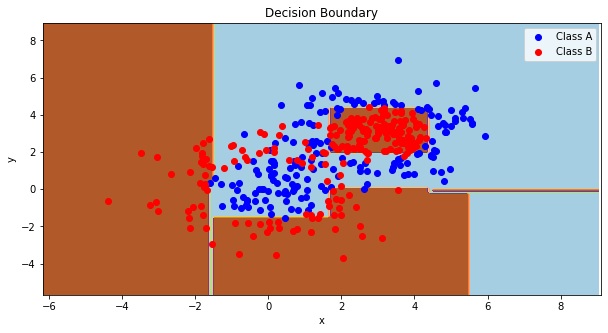

In [89]:
 
plot_colors = "br"
plot_step = 0.1
class_names = "AB"
 
plt.figure(figsize=(10, 5))
 
# Plot the decision boundaries
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")
 
# Plot the test points
print("Plotting the test points")
for i, n, c in zip(range(2), class_names, plot_colors):
    # plot first 400 test data points
    N = min(400,len(y_test))
    idx = np.where(y_test[0:N] == i)
    print("Plotting ",len(idx)," datapoints.")
    plt.scatter(X_test[idx, 0], X_test[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision Boundary')

Text(0.7, 0.5, 'AUC = 0.94')

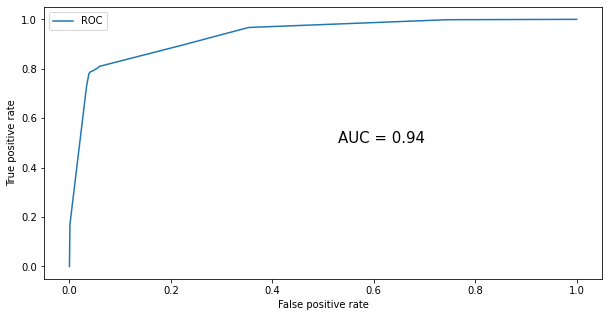

In [90]:
        # plot the roc curve
        figure = plt.figure(figsize=(10, 5))
        ZZ = clf.predict_proba(X_test)[:, 1]
        #print(y_test.shape,"   ",Z.shape)
        fpr, tpr, _ = roc_curve(y_test, ZZ)
        plt.plot(fpr, tpr, label="ROC")
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        #plt.title('ROC curve')
        plt.legend(loc='best')
        auc = roc_auc_score(y_test, ZZ)
        plt.text(0.7, 0.5, ('AUC = %.2f' % auc),
                size=15, horizontalalignment='right')




---


# <font color='red'> **Exercise:**
* play with bagging and boosting and check, how ensamble methods improve the classification

#<font color='green'> **Summary of Boosting and Bagging**

* Boosting, bagging – in a magic way we can build a strong classifier out of weak ones.
* Commonly used for decision trees, because they are simple and fast.
* Gives good results:
 -  „the best out-of-box classification algorithm”.



---
---
---




# <font color='green'>**Complete example - classification of faces**

**Use of PCA and various classifiers**

<span style="color:#000000">PCA – each face can be represented as a combination of a limited number of “eigenfaces” (like for hand-written digits recognition).</span>


# <font color='red'>**Exercise:**

* try various classifiers
 * KNeighborsClassifier(n_neighbours)
 * GaussianNB()
 * LinearDiscriminantAnalysis()
 * DecisionTreeClassifier(max_depth=jj)
 * Boosted/bagged decision trees


* and various number of PCA eigenfaces 

In [91]:
%matplotlib inline


# Faces recognition example using eigenfaces


The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)


Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
================== ============ ======= ========== =======


Example from https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html
modified by MW

In [92]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from scipy.stats import randint

from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, balanced_accuracy_score

from sklearn.decomposition import PCA



#print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')



In [93]:

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1] # number of pixels

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)



Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [94]:

# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# Scaling - very important!!!
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction

# number of PCA components
n_components = 128 #16 #32 #8

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train the classification model

print("Fitting the classifier to the training set")
t0 = time()

#clf = KNeighborsClassifier(10)
#clf = GaussianNB()
clf = LinearDiscriminantAnalysis()
#clf = DecisionTreeClassifier(max_depth=5)
#clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=20)



# Fit the classifier
clf = clf.fit(X_train_pca, y_train)


'''
# Example of a simple hyperparameter optimization
# Optimize the KNeighborsClassifier
clf = KNeighborsClassifier()
# grid of n_neighbours to be tested
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 100], }
clf = GridSearchCV(clf,param_grid,cv=2)
clf = clf.fit(X_train_pca, y_train)
# This value gives the best performance
print('Best params: ',clf.best_params_)
'''

print("done in %0.3fs" % (time() - t0))




Extracting the top 128 eigenfaces from 966 faces
done in 0.360s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.038s
Fitting the classifier to the training set
done in 0.094s


In [100]:


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)



print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
print(" ")
print("Train accuracy: ",balanced_accuracy_score(y_train, clf.predict(X_train_pca)))
print("Test  accuracy: ",balanced_accuracy_score(y_test,  clf.predict(X_test_pca)))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.69      0.64        13
     Colin Powell       0.80      0.88      0.84        60
  Donald Rumsfeld       0.77      0.74      0.75        27
    George W Bush       0.93      0.93      0.93       146
Gerhard Schroeder       0.77      0.80      0.78        25
      Hugo Chavez       0.83      0.67      0.74        15
       Tony Blair       0.87      0.72      0.79        36

         accuracy                           0.85       322
        macro avg       0.80      0.78      0.78       322
     weighted avg       0.85      0.85      0.85       322

[[  9   1   3   0   0   0   0]
 [  2  53   0   2   0   1   2]
 [  4   1  20   1   1   0   0]
 [  0   5   3 136   2   0   0]
 [  0   1   0   3  20   1   0]
 [  0   2   0   0   1  10   2]
 [  0   3   0   5   2   0  26]]
 
Train accuracy:  0.9294503121203349
Test  accuracy:  0.7766825006551034


Reference for clf = LinearDiscriminantAnalysis() and PCA n_components = 128:

* Train accuracy:  0.93
* Test  accuracy:  0.78

In [96]:
# define a funtion to plot the gallery

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(min(n_row * n_col, len(images))):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


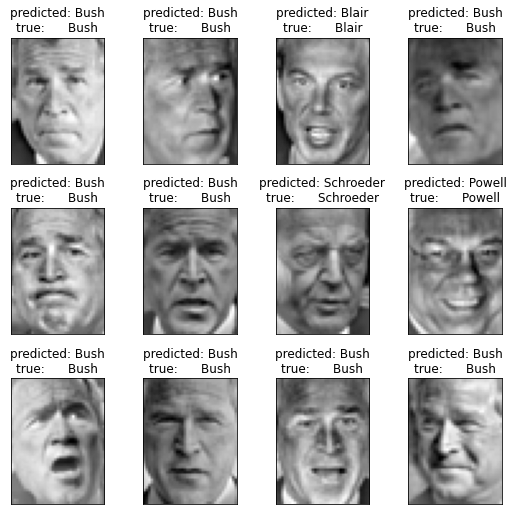

In [97]:

# #############################################################################
# Qualitative evaluation of the predictions using matplotlib
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

plt.show()

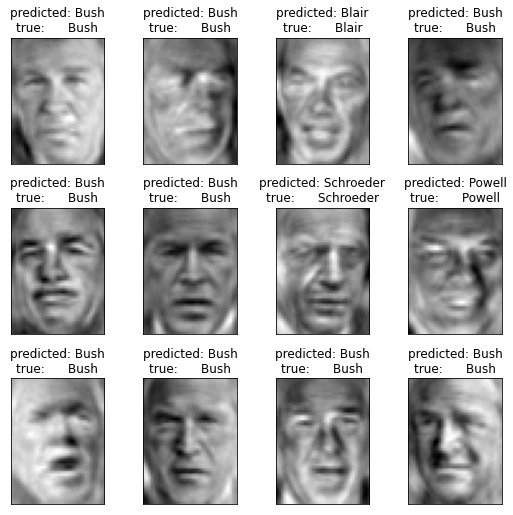

In [98]:
# plot PCA reconstructed faces
plot_gallery(pca.inverse_transform(X_test_pca), prediction_titles, h, w)

plt.show()

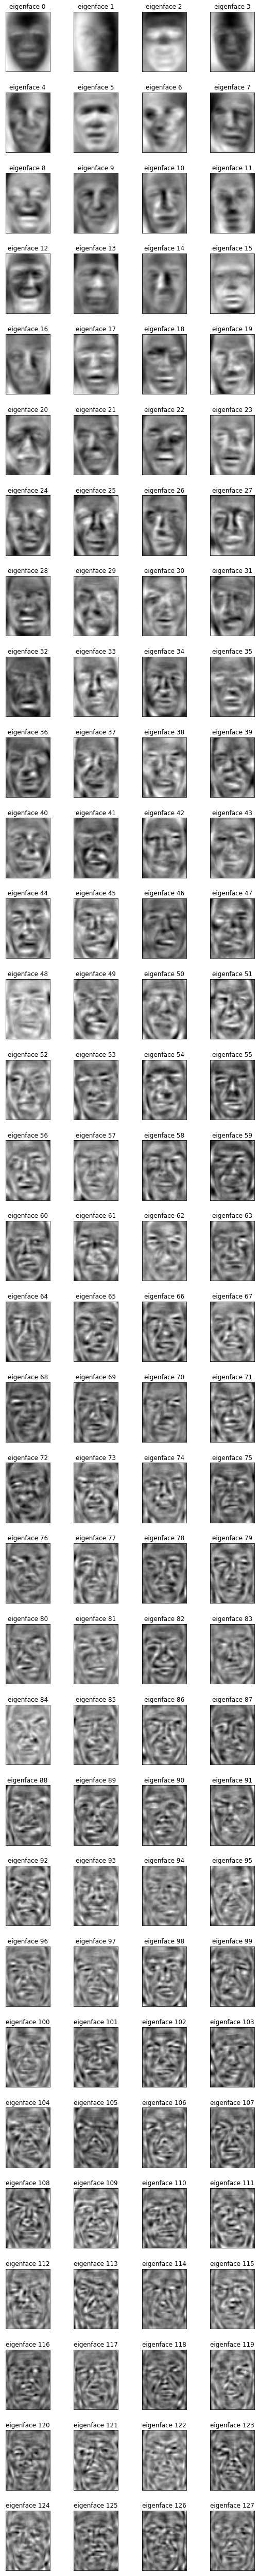

In [99]:
# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, int(eigenfaces.shape[0] / 4)+1, 4) 


plt.show()

# <font color='green'> **Simple optimization of hyperparameters**



1.   Define the classifier: KNeighborsClassifier has one hyperparameter *n_neighbors* 
2.   Give a list of hyperparameter values to be tested.
3.   GridSearchCV - exhaustive search over specified parameter values for an estimator.



```
# Optimize the KNeighborsClassifier
clf = KNeighborsClassifier()
# grid of n_neighbours to be tested
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 8, 10, 15, 20, 30, 40, 50, 100], }
clf = GridSearchCV(clf,param_grid,cv=2)
clf = clf.fit(X_train_pca, y_train)
# This value gives the best performance
print('Best params: ',clf.best_params_)
```



#<font color='green'> **Summary**

* <span style="color:#000000">We have learned about simple classifiers…\.</span>
 * K Nearest Neighbors
 * Decision Tree
* We can make strong classifier out of weak classifiers by ensamble learning:
 * Boosting - AdaBoost
 * Bagging 
* Boosted/Bagged Decision Trees are a powerful, nonlinear machine learning tool.

